## Observations and Insights 

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
print(len(study_data_complete))
study_data_complete.head()

1893


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_count = study_data_complete.drop_duplicates(subset=['Mouse ID'])
print(len(mice_count))

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
xc = study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])
study_data_complete['duplicates'] = xc
#study_data_complete
indices = list(np.where(study_data_complete["duplicates"]==True))

#indices
#study_data_complete.iloc[indices[0]]
print('Duplicate Mouse ID: g989')

Duplicate Mouse ID: g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = list(np.where(study_data_complete["Mouse ID"]=='g989'))
study_data_complete.iloc[dup_mouse[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),duplicates
107,g989,0,45.000000,0,Propriva,Female,21,26,False
137,g989,0,45.000000,0,Propriva,Female,21,26,True
329,g989,5,48.786801,0,Propriva,Female,21,26,False
360,g989,5,47.570392,0,Propriva,Female,21,26,True
620,g989,10,51.745156,0,Propriva,Female,21,26,False
681,g989,10,49.880528,0,Propriva,Female,21,26,True
815,g989,15,51.325852,1,Propriva,Female,21,26,False
869,g989,15,53.442020,0,Propriva,Female,21,26,True
950,g989,20,55.326122,1,Propriva,Female,21,26,False
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete =study_data_complete.drop(columns=['duplicates'])
clean_df = study_data_complete[study_data_complete['Mouse ID'] != 'g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_df.drop_duplicates(subset=['Mouse ID'])
print(len(clean_count))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats = pd.DataFrame(clean_df.groupby('Drug Regimen').mean())
group = clean_df.groupby('Drug Regimen')
tumor_mean = group.mean()['Tumor Volume (mm3)']
tumor_median = group.median()['Tumor Volume (mm3)']
tumor_variance = group.var()['Tumor Volume (mm3)']
tumor_deviation = group.std()['Tumor Volume (mm3)']
tumor_error = group.sem()['Tumor Volume (mm3)']
stats['Mean Tumor Volume'] = tumor_mean
stats['Median Tumor Volume'] = tumor_median
stats['Tumor Volume Variance'] = tumor_variance
stats['Tumor Volume Std. Dev.'] = tumor_deviation
stats['Tumor Volume Std. Err.'] = tumor_error
stats = stats.drop(columns=['Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Age_months', 'Weight (g)'])
#stats['Median Tumor Volume'] = clean_df['Drug Regimen'].median()
stats
#x = clean_df.groupby('Drug Regimen').median()
#x

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#clean_df.groupby('Drug Regimen').agg(columns={'mean' : np.mean,
                                                    'median': np.median,
                                                    'variance': np.var,
                                                    'std': np.std,
                                                    'sem': st.sem})


IndentationError: unexpected indent (<ipython-input-115-acbecaa6d1fc>, line 5)

## Bar and Pie Charts

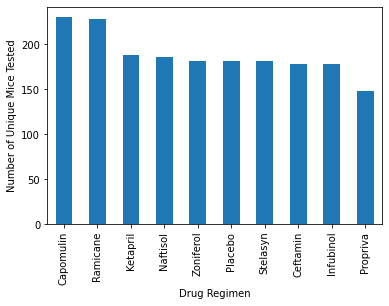

In [120]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#gather values for y axis
mice_drug_count = list(clean_df['Drug Regimen'].value_counts())

#gather ordered list of drug names
drugs = pd.DataFrame(group['Drug Regimen'].count())
#won't let you sort when column and index is "drug regimen"
drugs = drugs.rename(columns={'Drug Regimen': 'Count'})
#sort
drugs = drugs.sort_values(by= ['Count'], ascending=False)
#convert to list to pass to plt.bar
drug_names = drugs.index.to_list()

panda_plot = pd.DataFrame()

panda_plot['Drug Regimen'] = drug_names
panda_plot['Number of Unique Mice Tested'] = mice_drug_count
ax = panda_plot.plot.bar(x='Drug Regimen', y='Number of Unique Mice Tested', ylabel = 'Number of Unique Mice Tested', legend=False)

Text(0, 0.5, 'Number of Data Points')

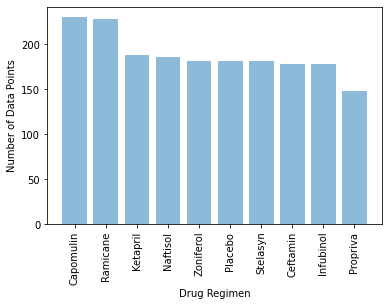

In [121]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#gather values for y axis
mice_drug_count = list(clean_df['Drug Regimen'].value_counts())

#gather ordered list of drug names
drugs = pd.DataFrame(group['Drug Regimen'].count())
#won't let you sort when column and index is "drug regimen"
drugs = drugs.rename(columns={'Drug Regimen': 'Count'})
#sort
drugs = drugs.sort_values(by= ['Count'], ascending=False)
#convert to list to pass to plt.bar
drug_names = drugs.index.to_list()


#print(names)
#df.groupby('cokey').apply(pd.DataFrame.sort_values, 'A', ascending=False)
#drugs = drugs.sort()
#drugs = list(clean_df['Drug Regimen'].unique())
#drugs #= drugs.rank()
#drugs = np.arange(len(mice_drug_count))
#print(drugs)


plt.bar(drug_names, mice_drug_count, color='tab:blue', alpha=0.5)
plt.xticks(rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

['Female' 'Male']
Female    49.0
Male      51.0
Name: Sex, dtype: float64


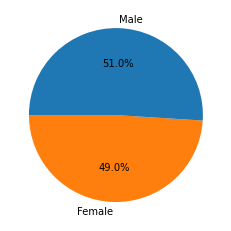

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#create labels
pie_labels = clean_df['Sex'].unique()

#create corresponding values
gender_percents = round(clean_df['Sex'].value_counts(normalize=True, ascending=True),2)*100

#set colors
colors = ['Tab:Orange','Tab:Blue']

#create pie plot
gender_chart = plt.pie(gender_percents, labels=pie_labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=180)

#gender_chart.set_title('Sex', loc='left')


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#tumor_vol = clean_df.groupby('')
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = study_data_complete.groupby(['Mouse ID']).last()
final_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,30.638696,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
